<a href="https://colab.research.google.com/github/candido05/ML_Projects/blob/main/Economic_Analysis_fredAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
!pip install fredapi

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from fredapi import Fred

In [145]:
from google.colab import userdata
fred_api = userdata.get('fred_api')

### Criando o objeto Fred

In [146]:
fred = Fred(api_key=fred_api)
fred

### Puxando os dados

In [147]:
data_sp = fred.search('S&P', order_by='popularity')
data_sp.head(10)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-07-06,2024-07-06,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-07-04,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-07-05 16:55:03-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-07-06,2024-07-06,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-06-25 08:12:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-07-06,2024-07-06,S&P 500,2014-07-07,2024-07-05,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-07-05 19:11:03-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-07-06,2024-07-06,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-07-06,2024-07-06,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-07-04,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-07-05 16:55:06-05:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2024-07-06,2024-07-06,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2024-07-04,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-07-05 17:02:02-05:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPISA,CSUSHPISA,2024-07-06,2024-07-06,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2024-06-25 08:12:01-05:00,78,"For more information regarding the index, plea..."
DJIA,DJIA,2024-07-06,2024-07-06,Dow Jones Industrial Average,2014-07-07,2024-07-05,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-07-05 19:11:57-05:00,74,The observations for the Dow Jones Industrial ...
MEHOINUSA646N,MEHOINUSA646N,2024-07-06,2024-07-06,Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,Current Dollars,Current $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:04-05:00,72,Household data are collected as of March. As ...


In [148]:
data_sp.shape

(1000, 15)

In [149]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

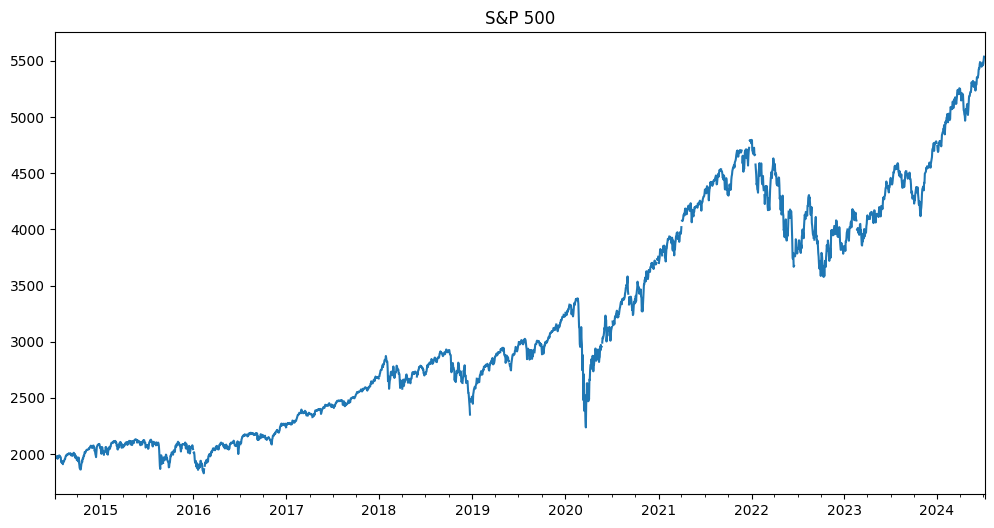

In [150]:
sp500.plot(figsize=(12, 6), title='S&P 500')

### Pulling e juntando múltiplas Series

In [151]:
unem_data = fred.search('unemployment', order_by='popularity')
unem_data.head(10)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2024-07-06,2024-07-06,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2024-05-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2024-06-12 09:38:03-05:00,95,The Consumer Price Index for All Urban Consume...
UNRATE,UNRATE,2024-07-06,2024-07-06,Unemployment Rate,1948-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-05 07:52:02-05:00,95,The unemployment rate represents the number of...
PAYEMS,PAYEMS,2024-07-06,2024-07-06,"All Employees, Total Nonfarm",1939-01-01,2024-06-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-07-05 07:55:01-05:00,83,"All Employees: Total Nonfarm, commonly known a..."
ICSA,ICSA,2024-07-06,2024-07-06,Initial Claims,1967-01-07,2024-06-29,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-07-03 07:33:02-05:00,81,An initial claim is a claim filed by an unempl...
SAHMREALTIME,SAHMREALTIME,2024-07-06,2024-07-06,Real-time Sahm Rule Recession Indicator,1959-12-01,2024-06-01,Monthly,M,Percentage Points,Percentage Points,Seasonally Adjusted,SA,2024-07-05 08:05:01-05:00,80,Sahm Recession Indicator signals the start of ...
CES0500000003,CES0500000003,2024-07-06,2024-07-06,"Average Hourly Earnings of All Employees, Tota...",2006-03-01,2024-06-01,Monthly,M,Dollars per Hour,$ per Hour,Seasonally Adjusted,SA,2024-07-05 07:55:08-05:00,78,The series comes from the 'Current Employment ...
CCSA,CCSA,2024-07-06,2024-07-06,Continued Claims (Insured Unemployment),1967-01-07,2024-06-22,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-07-03 07:33:04-05:00,74,"Continued claims, also referred to as insured ..."
LNS14000006,LNS14000006,2024-07-06,2024-07-06,Unemployment Rate - Black or African American,1972-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-05 07:52:03-05:00,72,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2024-07-06,2024-07-06,Unemployment Level,1948-01-01,2024-06-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-07-05 07:52:04-05:00,71,The series comes from the 'Current Population ...


<Axes: title={'center': 'Unemployment Rate'}>

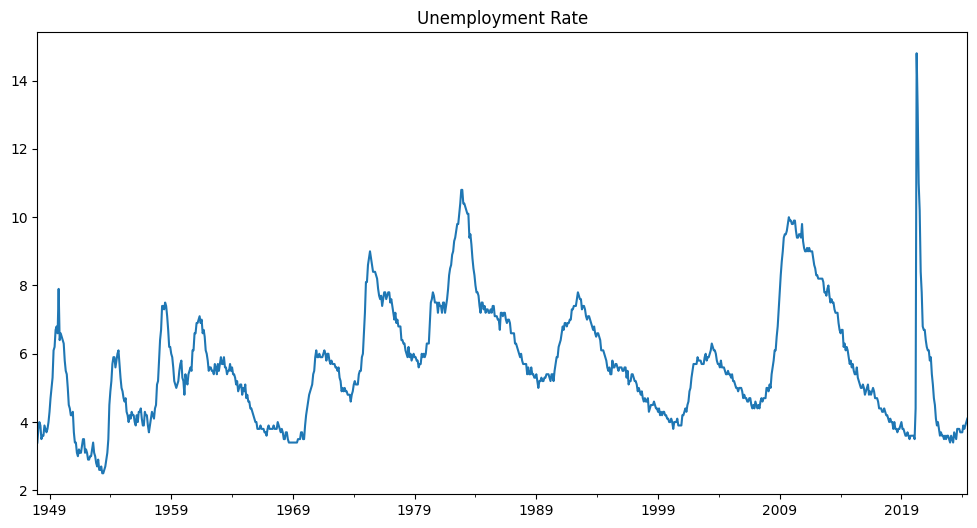

In [152]:
unem_rate = fred.get_series(series_id='UNRATE')
unem_rate.plot(figsize=(12, 6), title='Unemployment Rate')

In [153]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df.head(10)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-07-06,2024-07-06,Unemployment Rate,1948-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-05 07:52:02-05:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-07-06,2024-07-06,Unemployment Rate - Black or African American,1972-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-05 07:52:03-05:00,72,The series comes from the 'Current Population ...
CAUR,CAUR,2024-07-06,2024-07-06,Unemployment Rate in California,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:02-05:00,64,None
TXUR,TXUR,2024-07-06,2024-07-06,Unemployment Rate in Texas,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:03-05:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2024-07-06,2024-07-06,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
LNS14000024,LNS14000024,2024-07-06,2024-07-06,Unemployment Rate - 20 Yrs. & over,1948-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-05 07:52:08-05:00,56,The series comes from the 'Current Population ...
LNS14000031,LNS14000031,2024-07-06,2024-07-06,"Unemployment Rate - 20 Yrs. & over, Black or A...",1972-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-05 07:52:08-05:00,56,The series comes from the 'Current Population ...
M0892BUSM156SNBR,M0892BUSM156SNBR,2024-07-06,2024-07-06,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,14,Series Is Presented Here As Three Variables--(...
NYUR,NYUR,2024-07-06,2024-07-06,Unemployment Rate in New York,1976-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-26 12:20:03-05:00,53,None


In [154]:
all_results = []

for myid in unemp_df.index:
  results = fred.get_series(myid)
  results = results.to_frame(name=myid)
  all_results.append(results)

In [155]:
type(all_results) # lista de series

list

In [156]:
all_results[0]

,UNRATE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2024-02-01,3.9
2024-03-01,3.8
2024-04-01,3.9
2024-05-01,4.0


In [157]:
all_results[25]

,NJUR
1976-01-01,10.3
1976-02-01,10.3
1976-03-01,10.3
1976-04-01,10.3
1976-05-01,10.3
...,...
2024-01-01,4.8
2024-02-01,4.8
2024-03-01,4.8
2024-04-01,4.7


In [158]:
uemp_results = pd.concat(all_results, axis=1)
uemp_results.head(10)

,UNRATE,LNS14000006,CAUR,TXUR,M0892AUSM156SNBR,LNS14000024,LNS14000031,M0892BUSM156SNBR,NYUR,U2RATE,...,CNERUR,LRUNTTTTUSM156S,CWSTUR,CNEWUR,LNS14000026,LNS14000048,LNS14000089,M08311USM156SNBR,LNS14000150,LRUN25TTUSM156S
1929-04-01,NaN,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-09-01,NaN,NaN,NaN,NaN,0.91,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-10-01,NaN,NaN,NaN,NaN,2.31,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-11-01,NaN,NaN,NaN,NaN,1.89,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-12-01,NaN,NaN,NaN,NaN,2.08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930-01-01,NaN,NaN,NaN,NaN,2.21,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)
uemp_results.iloc[50:600]

,CAUR,TXUR,NYUR,FLUR,PAUR,OHUR,MIUR,ALUR,MAUR,NCUR,...,NEUR,CTUR,IDUR,NHUR,RIUR,KSUR,WYUR,DEUR,VTUR,SDUR
1933-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1933-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1933-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1933-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1933-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979-11-01,6.1,4.4,7.2,5.7,7.1,6.0,8.8,7.4,5.3,5.1,...,3.0,5.1,5.9,3.4,6.4,3.2,2.8,6.9,4.9,3.4
1979-12-01,6.1,4.5,7.1,5.6,7.1,6.1,9.2,7.5,5.3,5.1,...,3.0,5.1,6.1,3.4,6.4,3.3,3.0,6.9,4.9,3.5
1980-01-01,6.2,4.7,7.1,5.6,7.2,6.3,9.7,7.6,5.3,5.2,...,3.0,5.1,6.3,3.5,6.5,3.4,3.1,6.8,5.0,3.7
1980-02-01,6.3,4.9,7.1,5.6,7.4,6.6,10.4,7.7,5.3,5.3,...,3.1,5.2,6.7,3.7,6.7,3.6,3.2,6.9,5.1,3.9


In [160]:
uemp_states = uemp_results.copy()
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]
uemp_states.head(10)

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,...,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota
1976-01-01,9.2,5.8,10.3,9.7,8.0,8.1,9.9,6.6,10.5,6.4,...,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-02-01,9.2,5.8,10.3,9.7,8.1,8.1,9.9,6.6,10.5,6.4,...,3.3,9.8,5.6,6.5,7.8,4.2,4.1,8.0,8.6,3.3
1976-03-01,9.1,5.9,10.2,9.6,8.1,8.1,9.9,6.6,10.5,6.4,...,3.3,9.8,5.6,6.5,7.7,4.2,4.1,8.0,8.6,3.2
1976-04-01,9.1,5.9,10.2,9.5,8.1,8.0,9.8,6.5,10.3,6.3,...,3.2,9.6,5.6,6.5,7.7,4.2,4.0,8.1,8.6,3.1
1976-05-01,9.0,5.9,10.1,9.3,8.1,7.8,9.6,6.4,10.1,6.1,...,3.1,9.4,5.6,6.5,7.7,4.2,3.9,8.3,8.5,3.1
1976-06-01,9.0,5.9,10.2,9.2,8.0,7.6,9.4,6.5,9.8,6.0,...,3.1,9.3,5.6,6.5,7.7,4.1,3.8,8.6,8.4,3.1
1976-07-01,9.0,5.9,10.2,9.1,7.9,7.5,9.2,6.6,9.6,5.9,...,3.0,9.1,5.6,6.4,7.8,4.1,3.7,8.8,8.3,3.2
1976-08-01,9.1,5.8,10.2,9.1,7.9,7.5,9.1,6.7,9.4,5.9,...,3.1,9.0,5.6,6.4,8.0,4.1,3.7,8.9,8.2,3.3
1976-09-01,9.2,5.7,10.2,9.1,7.9,7.5,9.0,6.8,9.2,6.0,...,3.1,8.8,5.6,6.3,8.2,4.1,3.7,9.0,8.0,3.4
1976-10-01,9.3,5.7,10.2,9.1,7.9,7.5,9.0,6.9,9.1,6.2,...,3.1,8.7,5.7,6.3,8.4,4.1,3.7,9.1,7.9,3.5


In [161]:
px.line(uemp_states)

### Desemprego a parti de 2020 por estado

In [162]:
uemp_states.loc['2020-01-01':].head(10)

,California,Texas,New York,Florida,Pennsylvania,Ohio,Michigan,Alabama,Massachusetts,North Carolina,...,Nebraska,Connecticut,Idaho,New Hampshire,Rhode Island,Kansas,Wyoming,Delaware,Vermont,South Dakota
2020-01-01,4.3,3.5,4.1,3.0,4.5,4.4,3.7,3.2,3.0,3.8,...,3.0,3.8,2.8,2.6,3.6,3.1,4.4,3.6,2.0,2.6
2020-02-01,4.4,3.6,4.1,3.0,4.7,4.6,3.7,3.3,3.0,3.8,...,3.0,3.8,2.8,2.6,3.7,3.1,4.6,3.6,2.1,2.5
2020-05-01,15.8,11.6,16.7,14.2,12.9,12.8,19.2,10.4,14.9,11.6,...,6.4,11.8,9.1,11.8,15.4,9.1,8.7,13.4,9.5,6.6
2020-06-01,13.8,10.1,13.6,11.8,11.3,10.9,14.5,8.6,14.5,9.7,...,5.2,11.5,7.5,9.6,13.3,7.4,7.3,12.7,7.8,5.3
2020-07-01,13.2,9.3,12.5,11.8,10.4,9.8,12.5,7.5,12.6,8.7,...,4.6,11.7,6.6,8.3,12.2,6.7,6.8,7.5,6.7,4.7
2020-08-01,11.9,8.1,10.8,8.8,9.3,8.3,10.0,6.3,10.4,7.3,...,3.9,9.6,5.4,6.7,10.3,5.8,6.2,7.3,5.5,4.0
2020-09-01,10.0,7.7,10.2,8.1,8.8,7.6,8.9,5.9,9.7,6.7,...,3.5,8.8,5.0,6.1,9.9,5.4,5.9,7.5,4.9,3.7
2020-10-01,9.3,7.1,9.2,7.1,8.1,6.8,7.7,5.2,8.5,6.0,...,3.1,7.9,4.4,5.2,7.0,4.9,5.6,5.1,4.4,3.3
2020-11-01,9.0,7.0,9.0,6.6,7.9,6.4,7.1,4.8,7.9,5.8,...,3.0,7.5,4.2,4.8,7.0,4.7,5.5,5.3,4.2,3.2
2020-12-01,9.0,6.9,8.7,6.4,7.6,6.3,7.0,4.5,7.6,5.8,...,3.0,7.4,4.2,4.6,6.9,4.4,5.4,5.6,4.3,3.1


<Axes: title={'center': 'Unemployment Rate May 2020'}>

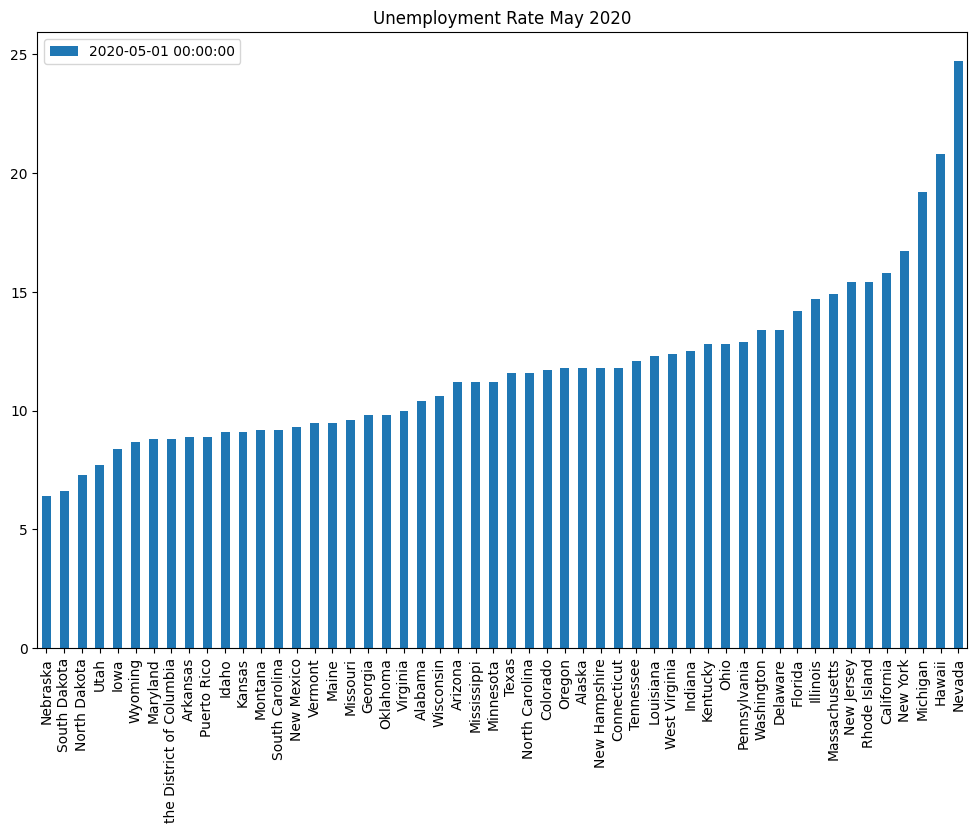

In [163]:
unem_may = uemp_states.loc[uemp_states.index == '2020-05-01'].T
unem_may.sort_values(by='2020-05-01', ascending=True, inplace=True)
unem_may.plot(kind='bar', figsize=(12, 8), title='Unemployment Rate May 2020')

### Taxa de empregabilidade

In [164]:
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [165]:
part_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CIVPART,CIVPART,2024-07-06,2024-07-06,Labor Force Participation Rate,1948-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-05 07:52:03-05:00,84,The series comes from the 'Current Population ...
LNS11300060,LNS11300060,2024-07-06,2024-07-06,Labor Force Participation Rate - 25-54 Yrs.,1948-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-05 07:52:05-05:00,70,The series comes from the 'Current Population ...
LNS11300002,LNS11300002,2024-07-06,2024-07-06,Labor Force Participation Rate - Women,1948-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-05 07:52:07-05:00,66,To obtain estimates of women worker employment...
LNS11300001,LNS11300001,2024-07-06,2024-07-06,Labor Force Participation Rate - Men,1948-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-05 07:52:07-05:00,61,The series comes from the 'Current Population ...
LNS11324230,LNS11324230,2024-07-06,2024-07-06,Labor Force Participation Rate - 55 Yrs. & over,1948-01-01,2024-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-07-05 07:52:09-05:00,54,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LRIN74MAUSM156S,LRIN74MAUSM156S,2024-07-06,2024-07-06,Infra-Annual Labor Statistics: Inactivity Rate...,1981-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-17 14:05:15-05:00,1,OECD Data Filters: REF_AREA: USA MEASURE: OLF...
LRIN64MAUSM156S,LRIN64MAUSM156S,2024-07-06,2024-07-06,Infra-Annual Labor Statistics: Inactivity Rate...,1977-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-17 14:05:19-05:00,1,OECD Data Filters: REF_AREA: USA MEASURE: OLF...
LRIN64FEUSM156S,LRIN64FEUSM156S,2024-07-06,2024-07-06,Infra-Annual Labor Statistics: Inactivity Rate...,1977-01-01,2024-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-06-17 14:05:19-05:00,1,OECD Data Filters: REF_AREA: USA MEASURE: OLF...


In [171]:
import time

us_states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut",
             "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa",
             "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan",
             "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire",
             "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
             "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota",
             "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia",
             "Wisconsin", "Wyoming", "The District of Columbia"]

filtered_df = part_df[part_df['title'].str.startswith('Labor Force Participation Rate') &
                      part_df['title'].str.contains('|'.join(us_states))]
part_id_to_state = filtered_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()

all_results = []
for myid in filtered_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1)

part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [172]:
part_states.head(10)

,California,Alabama,New York,Michigan,Mississippi,Texas,Florida,Kentucky,Ohio,Wisconsin,...,Oregon,New Hampshire,Vermont,Connecticut,North Dakota,South Dakota,Kansas,Rhode Island,Delaware,Wyoming
1976-01-01,62.6,57.0,58.0,61.6,58.8,63.8,55.8,60.5,61.7,65.6,...,62.9,65.9,63.6,64.2,62.6,64.6,65.1,63.8,62.7,65.3
1976-02-01,62.4,56.9,58.0,61.5,58.6,63.5,55.7,60.3,61.7,65.5,...,62.7,65.6,63.4,64.1,62.4,64.4,65.0,63.7,62.5,64.9
1976-03-01,62.2,56.8,58.0,61.5,58.5,63.4,55.5,60.2,61.7,65.4,...,62.5,65.6,63.2,64.0,62.3,64.4,64.9,63.6,62.5,64.7
1976-04-01,62.2,56.8,58.0,61.6,58.5,63.5,55.5,60.1,61.6,65.4,...,62.4,65.7,63.5,64.1,62.5,64.3,65.0,63.7,62.4,64.9
1976-05-01,62.3,56.8,58.1,61.7,58.5,63.6,55.4,60.1,61.6,65.5,...,62.5,66.0,63.6,64.3,62.6,64.3,65.1,63.6,62.4,65.2
1976-06-01,62.4,56.9,58.1,61.8,58.5,63.8,55.4,60.1,61.5,65.6,...,62.6,66.3,63.8,64.5,62.7,64.5,65.3,63.5,62.5,65.5
1976-07-01,62.5,56.9,58.2,61.9,58.5,63.9,55.3,60.0,61.4,65.7,...,62.9,66.6,63.8,64.6,62.9,64.6,65.4,63.4,62.5,65.8
1976-08-01,62.6,57.0,58.2,61.9,58.5,63.9,55.2,60.0,61.4,65.8,...,63.2,66.7,63.7,64.6,63.0,64.7,65.6,63.3,62.5,65.9
1976-09-01,62.7,57.1,58.1,61.9,58.5,63.9,55.1,59.9,61.3,65.9,...,63.4,66.7,63.5,64.5,63.2,64.8,65.7,63.2,62.7,66.0
1976-10-01,62.8,57.1,58.1,61.9,58.6,63.8,55.0,59.8,61.3,65.9,...,63.6,66.7,63.6,64.4,63.1,64.8,65.7,63.2,62.7,66.1


In [173]:
part_states.shape

(581, 50)

### Plotagem de Desemprego X Empregabilidade para cada estado

In [175]:
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

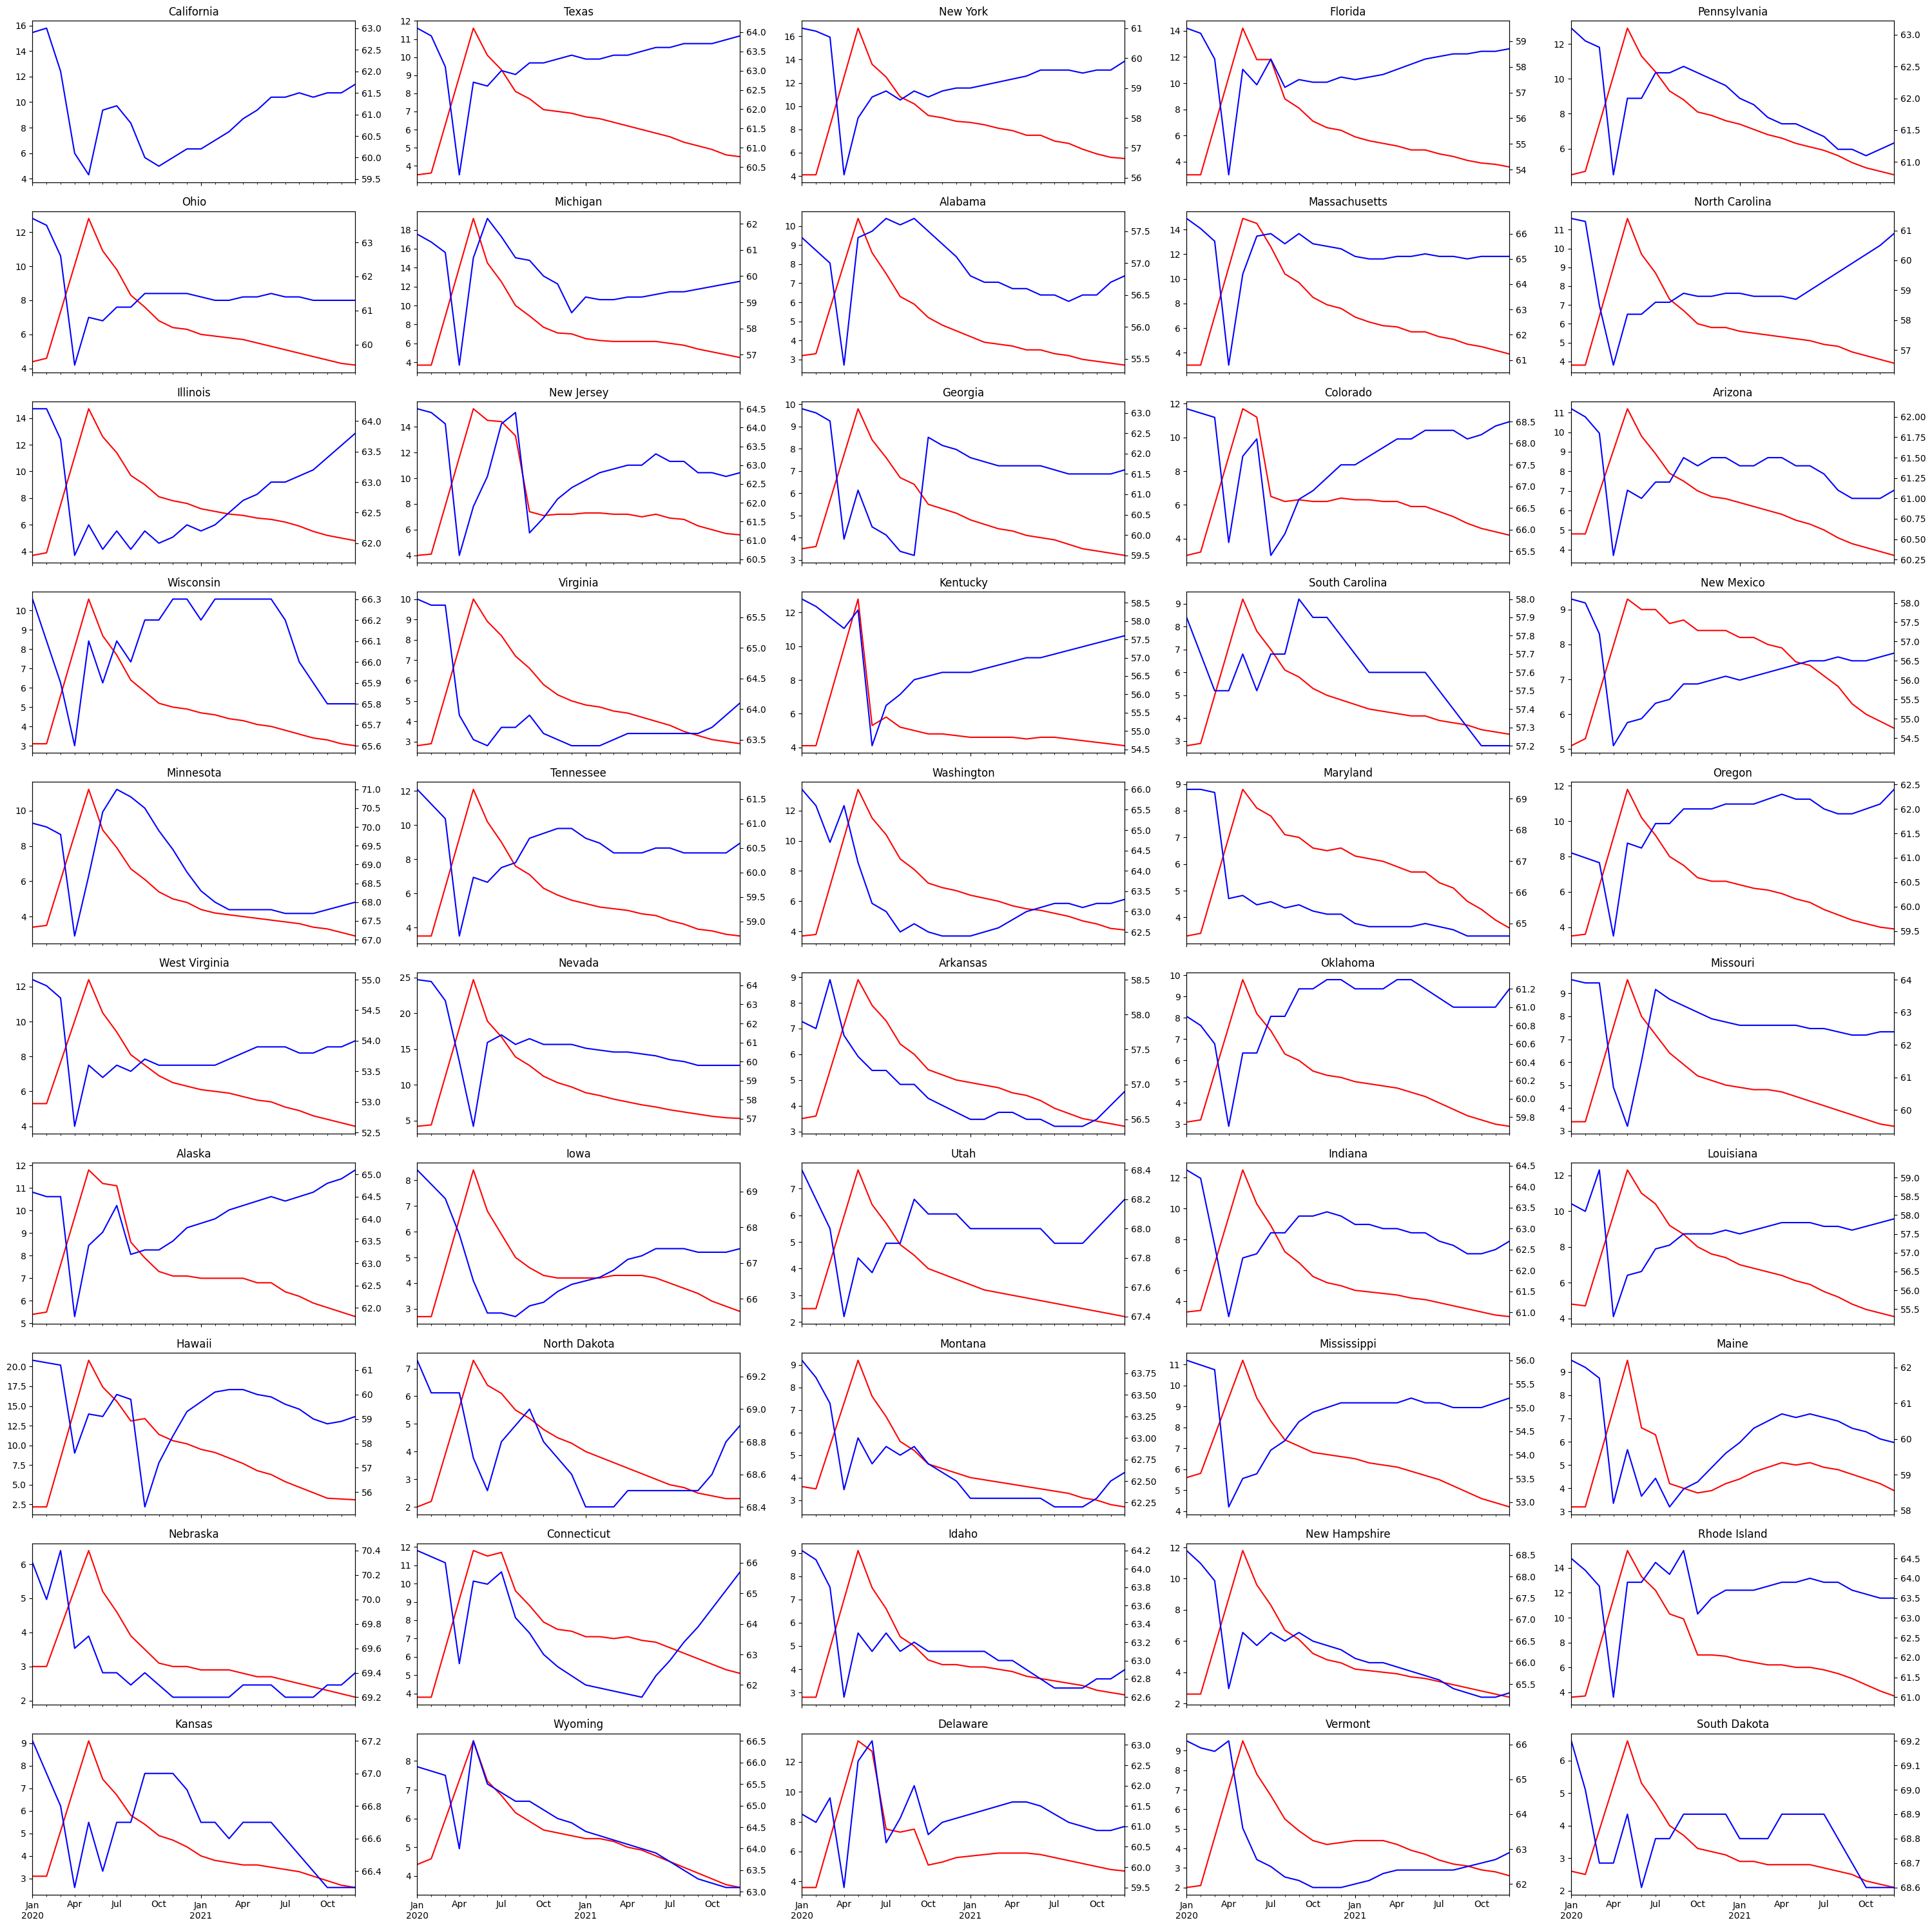

In [178]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment', color='red')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color='blue')
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

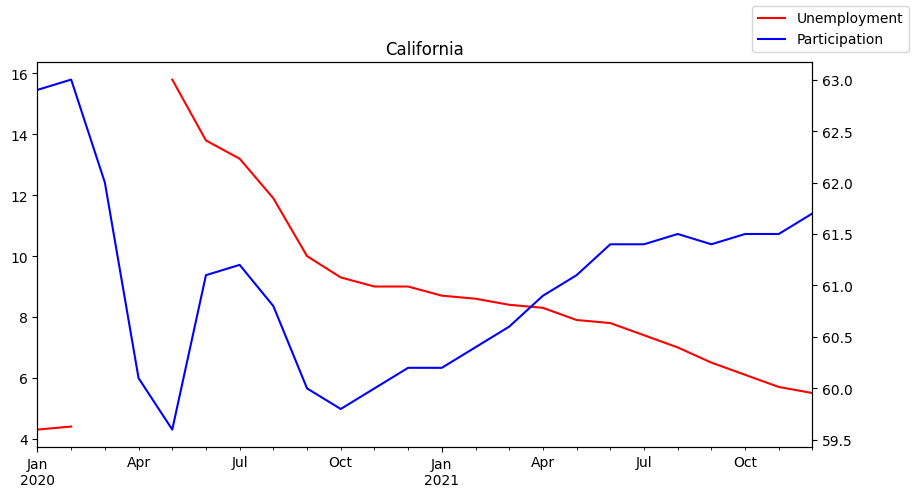

In [180]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment', color='red')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color='blue')
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()

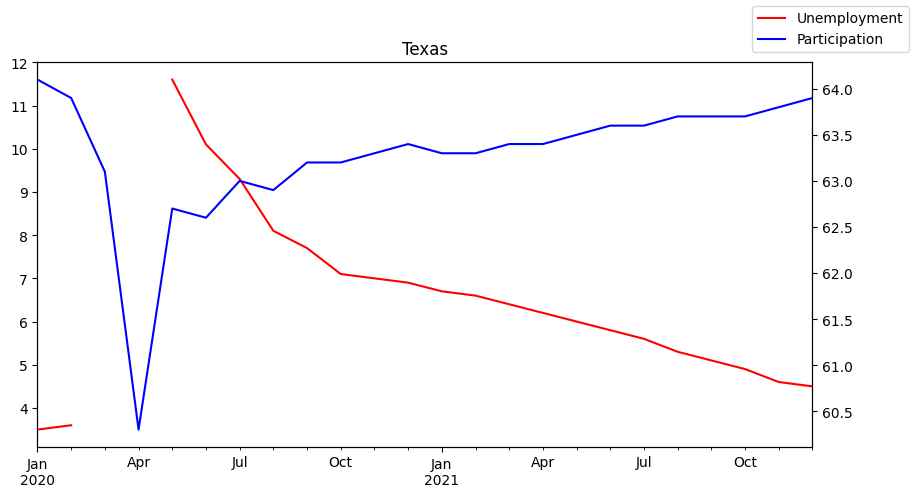

In [181]:
state = 'Texas'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment', color='red')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color='blue')
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()